### Лабораторная работа № 2: OpenCV. Basic operations

Цель: овладеть навыками работы с изображениями с использованием OpenCV


Задачи:

1. Считать изображение с диска. Вывести изображение из переменной на экран. Использовать для этого методы cv2.imread() и cv2.imshow(). Следует помнить, что imshow в блокнотах Jupyter не работает, поэтому нужно пользоваться либо библиотекой Matplotlib, либо патчем от Google, если работа выполняется в Google Colab.

2. Получить несколько видов бинарных изображений при помощи метода cv2.threshold(). Использовать при этом следует различные типы операций. Вывести на экран и сравнить изображения.

3. Перевести оригинальное изображение в цветовое пространство HSV. Вывести на экран по отдельности каналы H, S и V.

In [3]:
pip install opencv-python

In [2]:
import cv2
import matplotlib
from matplotlib import pyplot as plt

#### 1. Считать изображение с диска. Вывести изображение из переменной на экран. 

In [3]:
image = cv2.imread('data\snow_fox.jpg')
#cv2.imshow("snow fox", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Как и ожидалось, cv2.imshow не выводит картинку в Jupyter notebook. Поэтому с помощью matplotlib:

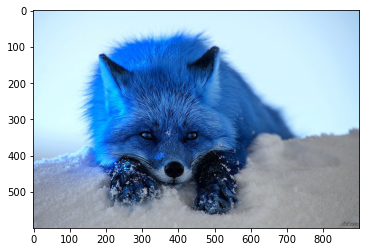

In [8]:
plt.imshow(image)

При чтении таким способом цветные декодированные изображения будут иметь каналы, сохраненные в порядке B G R 

А matplotlib ожидает, что массивы будут упорядочены по-другому (RGB как обычно). 

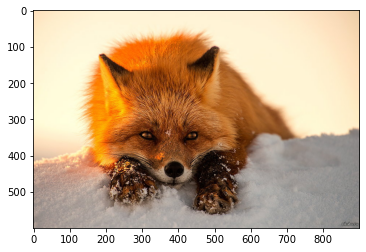

In [17]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

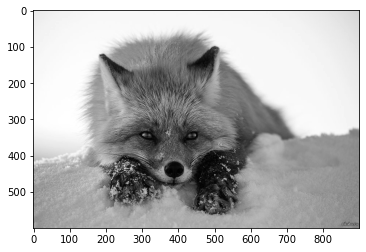

In [34]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap=plt.cm.gist_gray)

#### 2. Получить несколько видов бинарных изображений при помощи метода cv2.threshold(). Использовать при этом следует различные типы операций. Вывести на экран и сравнить изображения.

Функция threshold (image, X, A, B) возвращает такое изображение:

все пиксели, которые темнее (меньше) X заменены на B, а все, которые ярче (больше) X — на A.

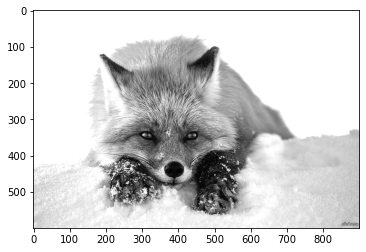

In [37]:
ret, threshold_image = cv2.threshold(image_gray, 100, 255, 10)

plt.imshow(threshold_image, cmap=plt.cm.gist_gray)


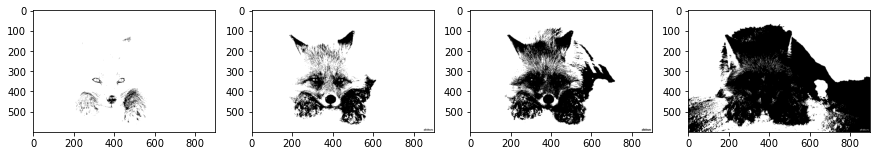

In [57]:
plt.figure(figsize=(15,15))

ret, threshold_image = cv2.threshold(image_gray, 10, 255, 0)
plt.subplot(1, 4, 1)
plt.imshow(threshold_image, cmap=plt.cm.gist_gray)

ret, threshold_image = cv2.threshold(image_gray, 70, 255, 0)
plt.subplot(1, 4, 2)
plt.imshow(threshold_image, cmap=plt.cm.gist_gray)

ret, threshold_image = cv2.threshold(image_gray, 110, 255, 0)
plt.subplot(1, 4, 3)
plt.imshow(threshold_image, cmap=plt.cm.gist_gray)

ret, threshold_image = cv2.threshold(image_gray, 160, 255, 0)
plt.subplot(1, 4, 4)
plt.imshow(threshold_image, cmap=plt.cm.gist_gray)

#### 3. Перевести оригинальное изображение в цветовое пространство HSV. Вывести на экран по отдельности каналы H, S и V

Hue, Saturation и Value (оттенок, насыщенность и яркость). 

Это цилиндрическое цветовое пространство. 

Цвета, или оттенки, меняются при движении по кругу цилиндра. 

Вертикальная ось отвечает за яркость: от темного (0 в нижней части) до светлого сверху. 
    
Третья ось, насыщенность, определяет тени оттенков при движении от центра к краю вдоль радиуса цилиндра (от менее к более насыщенному)

In [64]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


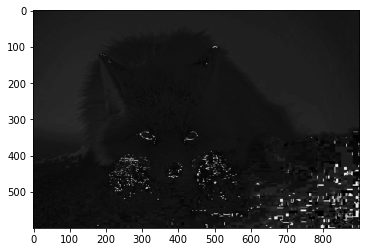

In [65]:
H = image_hsv[:,:,0]
H

In [62]:
S = image_hsv[:,:,1]
S

array([[66, 66, 66, ..., 76, 76, 76],
       [66, 66, 66, ..., 76, 76, 76],
       [66, 66, 66, ..., 76, 76, 76],
       ...,
       [33, 33, 33, ...,  4,  4,  4],
       [34, 34, 32, ...,  4,  4,  4],
       [33, 33, 33, ...,  0,  0,  0]], dtype=uint8)

In [63]:
V = image_hsv[:,:,2]
V

array([[254, 254, 255, ..., 235, 235, 234],
       [254, 254, 255, ..., 235, 235, 235],
       [254, 254, 255, ..., 235, 235, 235],
       ...,
       [168, 169, 170, ..., 129, 126, 125],
       [166, 165, 165, ..., 130, 127, 125],
       [164, 162, 160, ..., 133, 129, 127]], dtype=uint8)

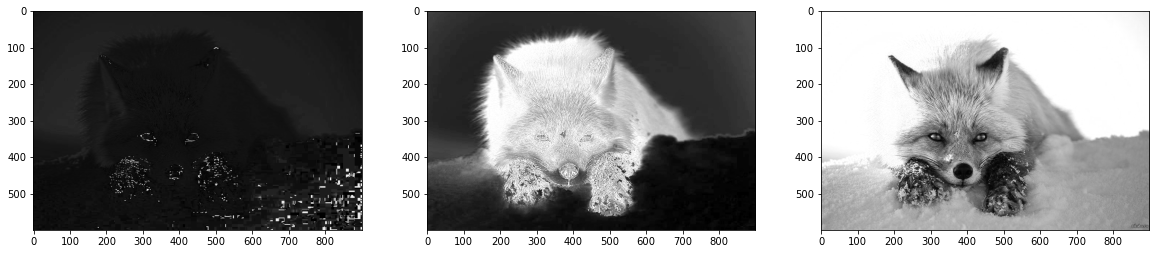

In [69]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(H, cmap=plt.cm.gist_gray)

plt.subplot(1, 3, 2)
plt.imshow(S, cmap=plt.cm.gist_gray)

plt.subplot(1, 3, 3)
plt.imshow(V, cmap=plt.cm.gist_gray)
